Written by Daksh Agrawal

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load the data
data = pd.read_csv('../data/curated/historical_data.csv')
data

,type,suburb,Count,Date,Median,year_completed,sa2_name,sa2_code,Unnamed: 0,SA2_CODE,Population
0,1 bedroom flat,Armadale,210.0,2000-03-01,150.0,2000,Armadale,206061135,673,206061135,8593.575342
1,1 bedroom flat,Docklands,NaN,2000-03-01,NaN,2000,Docklands,206041118,650,206041118,-427.643836
2,1 bedroom flat,East Melbourne,203.0,2000-03-01,180.0,2000,East Melbourne,206041119,651,206041119,3634.561644
3,1 bedroom flat,Elwood,585.0,2000-03-01,150.0,2000,Elwood,206051129,666,206051129,13222.958904
4,1 bedroom flat,Fitzroy,176.0,2000-03-01,140.0,2000,Fitzroy,206071142,681,206071142,8173.356164
...,...,...,...,...,...,...,...,...,...,...,...
29619,All properties,Seymour,143.0,2023-03-01,365.0,2023,Seymour,204011059,48609,204011059,6686.698630
29620,All properties,Swan Hill,299.0,2023-03-01,320.0,2023,Swan Hill,215031404,49037,215031404,10927.287671
29621,All properties,Torquay,547.0,2023-03-01,620.0,2023,Torquay,203031053,48601,203031053,26174.054795
29622,All properties,Warragul,497.0,2023-03-01,440.0,2023,Warragul,205011079,48630,205011079,24572.342466


In [18]:
# Check for missing values
data.isnull().sum()

type                 0
suburb               0
Count             1883
Date                 0
Median            1883
year_completed       0
sa2_name             0
sa2_code             0
Unnamed: 0           0
SA2_CODE             0
Population           0
dtype: int64

In [19]:
# Drop the missing values
data.dropna(inplace=True)

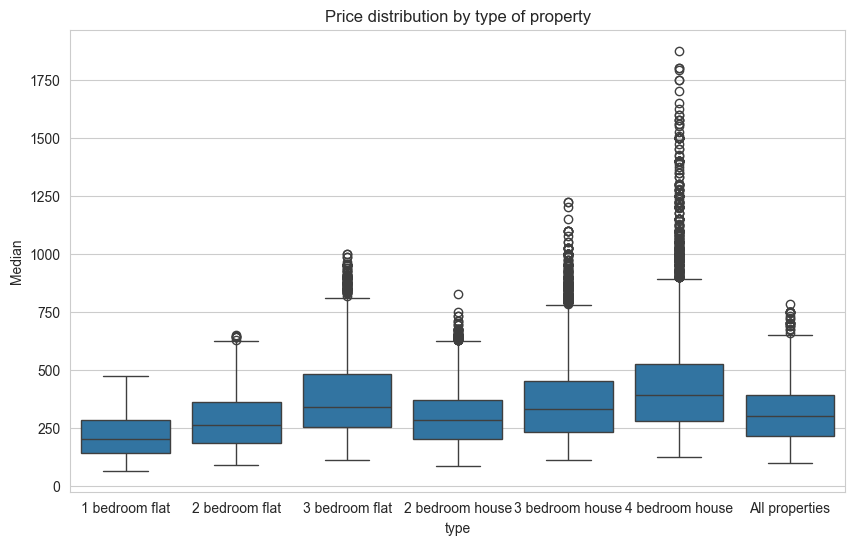

In [20]:
# Plot the price for each type of property
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Median', data=data)
plt.title('Price distribution by type of property')
plt.show()

In [21]:
# Convert the Date column to datetime
# data['Date'] = pd.to_datetime(data['Date'])

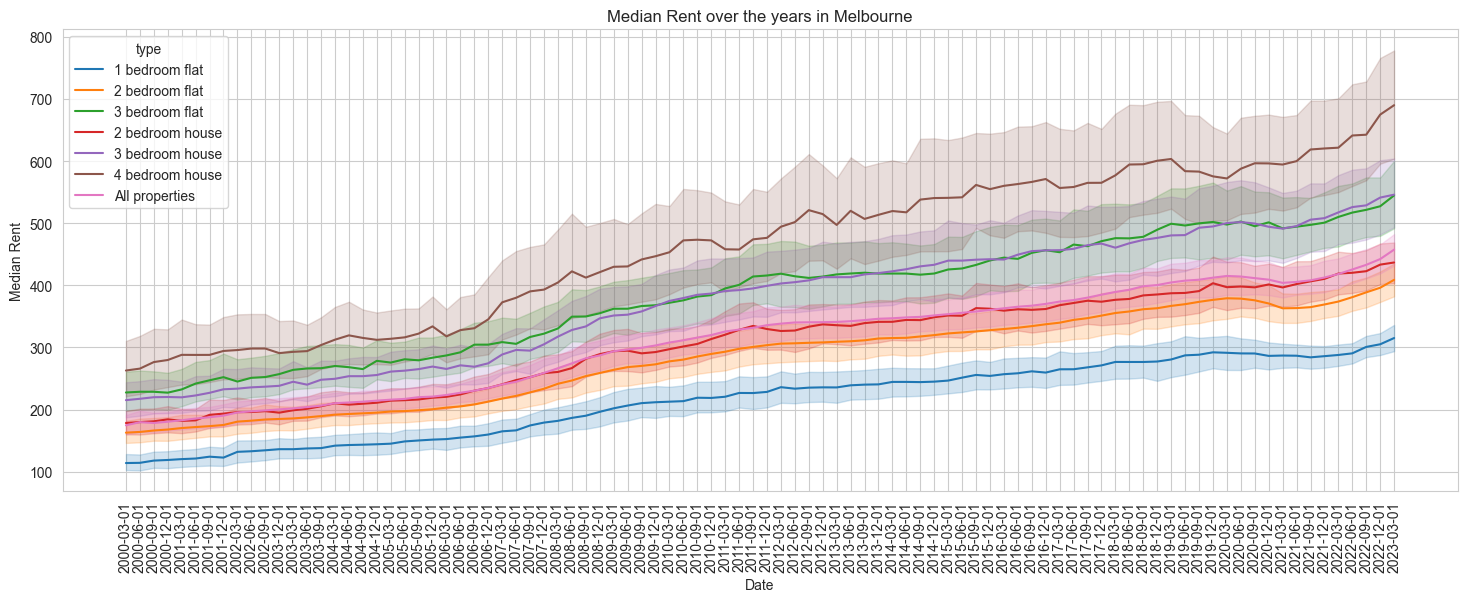

In [22]:
# Plot the price by Date
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=data, hue='type')
plt.title('Median Rent over the years in Melbourne')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Calculate the rent slope for each suburb over the years
slopes = []
for suburb in data['suburb'].unique():
    df = data[data['suburb'] == suburb]
    x = np.arange(len(df))
    y = df['Median']
    slope = np.polyfit(x, y, 1)[0]
    slopes.append((suburb, slope))
slopes = pd.DataFrame(slopes, columns=['suburb', 'slope'])
slopes = slopes.sort_values(by='slope', ascending=False)
slopes

,suburb,slope
6,Toorak,0.996953
38,Brighton East,0.771530
41,Docklands,0.743663
0,Armadale,0.720109
2,Elwood,0.650947
1,East Melbourne,0.629093
11,Elsternwick,0.546974
16,Williamstown,0.525242
3,Fitzroy,0.487861
4,Port Melbourne,0.474346


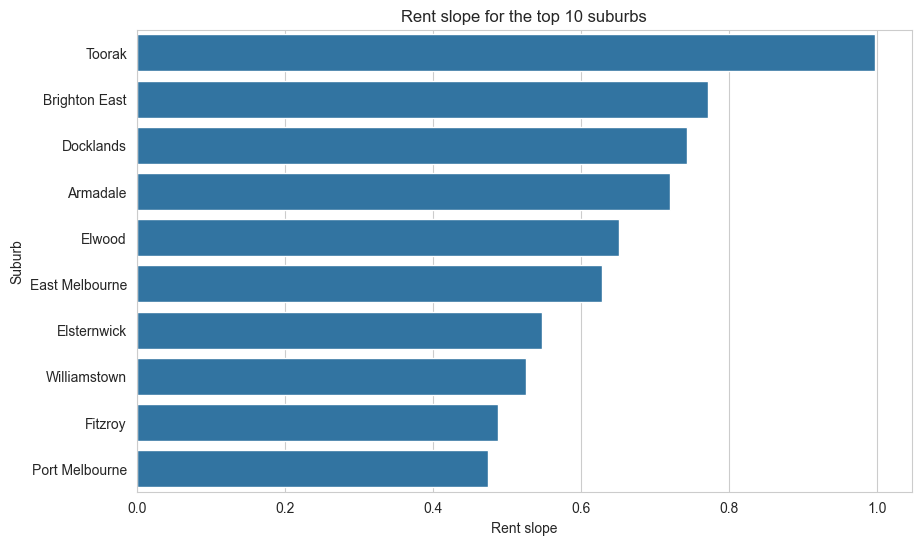

In [24]:
# Plot the rent slope for some suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.head(10))
plt.title('Rent slope for the top 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

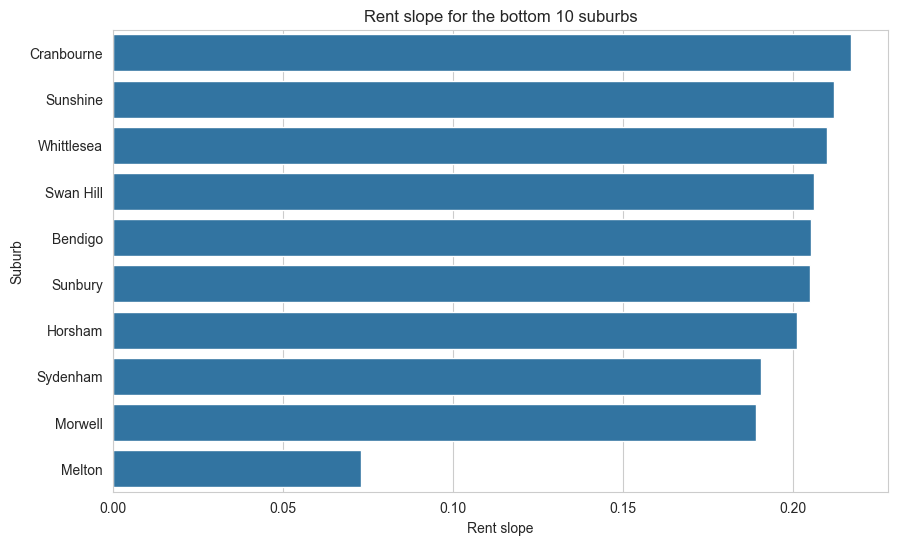

In [25]:
# Plot the rent slope for bottom 10 suburbs
plt.figure(figsize=(10, 6))
sns.barplot(x='slope', y='suburb', data=slopes.tail(10))
plt.title('Rent slope for the bottom 10 suburbs')
plt.xlabel('Rent slope')
plt.ylabel('Suburb')
plt.show()

/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_5377/444705582.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
/var/folders/_7/sr3p02zn35v2xg1fm8dsbz6c0000gn/T/ipykernel_5377/444705582.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)


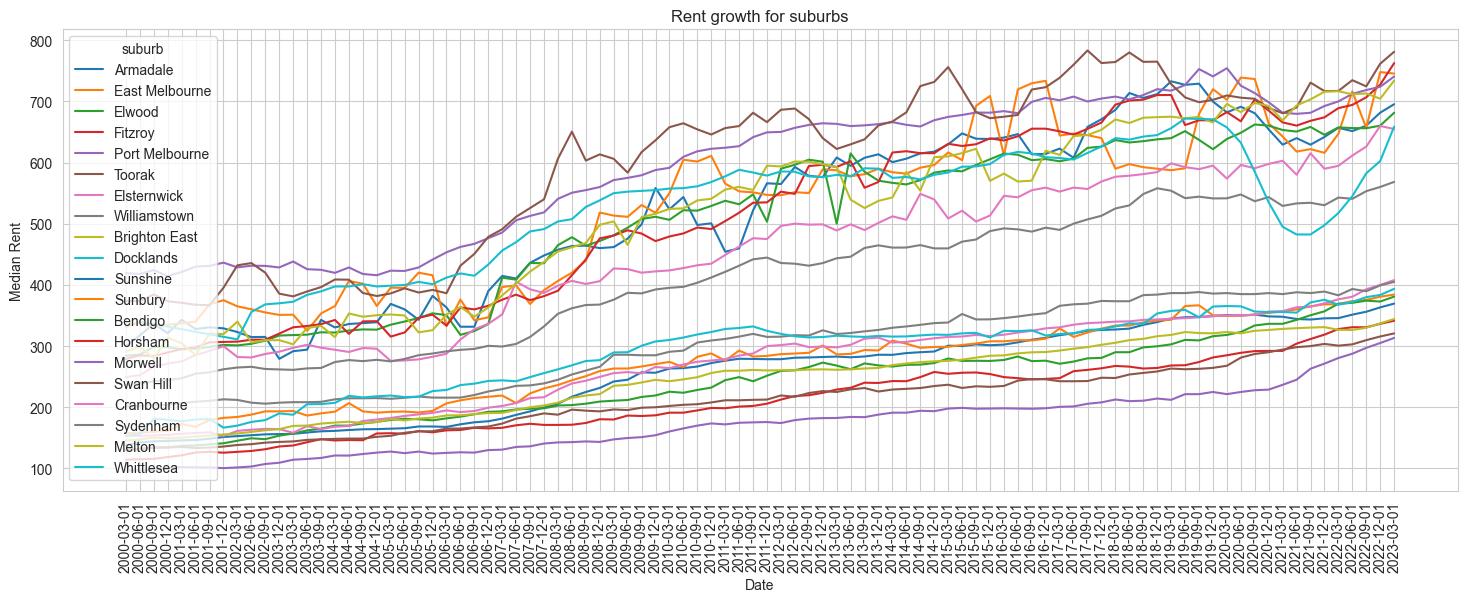

In [26]:
# Plot the rent growth for top and bottom 10 suburbs (lineplot of the median rent)
top_10 = slopes.head(10)
bottom_10 = slopes.tail(10)
top_10_data = data[data['suburb'].isin(top_10['suburb'])]
bottom_10_data = data[data['suburb'].isin(bottom_10['suburb'])]
plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Median', data=top_10_data, hue='suburb', ci=None)
sns.lineplot(x='Date', y='Median', data=bottom_10_data, hue='suburb', ci=None)
plt.title('Rent growth for suburbs')
plt.xlabel('Date')
plt.ylabel('Median Rent')
plt.xticks(rotation=90)
plt.show()

In [27]:
# Finding the relative stability of rent for each suburb
stability = []
for suburb in data['suburb'].unique():
    df = data[data['suburb'] == suburb]
    stability.append((suburb, df['Median'].std()))
stability = pd.DataFrame(stability, columns=['suburb', 'stability'])
stability = stability.sort_values(by='stability', ascending=False)
stability

,suburb,stability
6,Toorak,357.567327
0,Armadale,270.604092
2,Elwood,248.435996
1,East Melbourne,223.791144
4,Port Melbourne,213.832608
38,Brighton East,212.851724
3,Fitzroy,211.166800
11,Elsternwick,205.669343
5,South Melbourne,178.088932
41,Docklands,175.858678


In [28]:
# Join the stability and slope dataframes
stability = stability.merge(slopes, on='suburb')
stability

,suburb,stability,slope
0,Toorak,357.567327,0.996953
1,Armadale,270.604092,0.720109
2,Elwood,248.435996,0.650947
3,East Melbourne,223.791144,0.629093
4,Port Melbourne,213.832608,0.474346
5,Brighton East,212.851724,0.771530
6,Fitzroy,211.166800,0.487861
7,Elsternwick,205.669343,0.546974
8,South Melbourne,178.088932,0.457888
9,Docklands,175.858678,0.743663


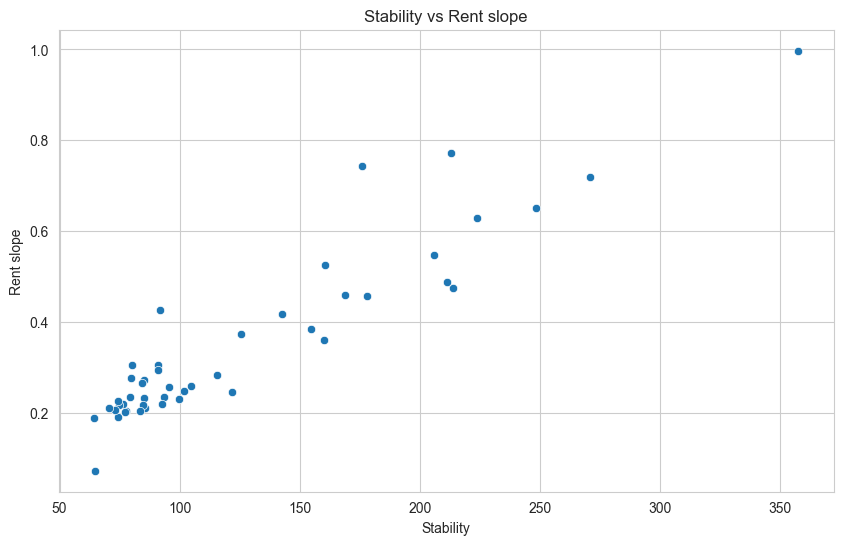

In [29]:
# Plot stability vs rent slope
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stability', y='slope', data=stability)
plt.title('Stability vs Rent slope')
plt.xlabel('Stability')
plt.ylabel('Rent slope')
plt.show()

In [30]:
# Find the pearson correlation between stability and rent slope along with the p-value
from scipy.stats import pearsonr
corr, p_value = pearsonr(stability['stability'], stability['slope'])
corr, p_value

(np.float64(0.9312897343366076), np.float64(6.461711561536894e-21))

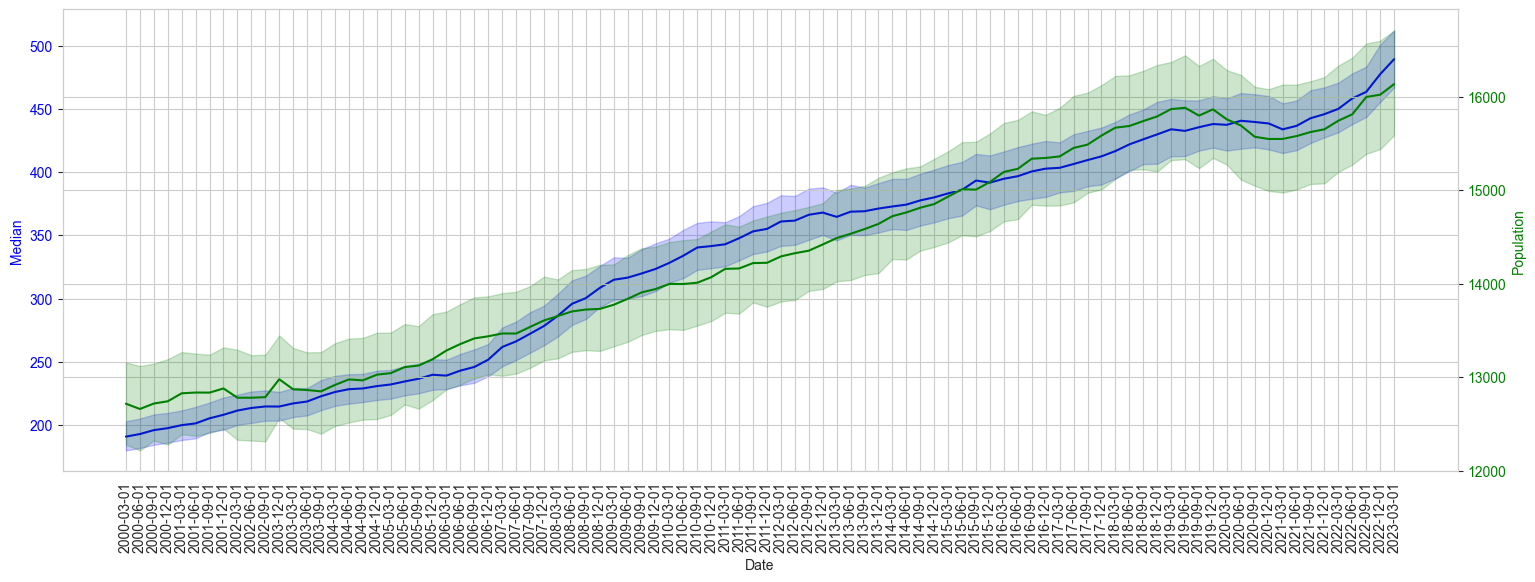

In [36]:
# Set up the figure and primary axis
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the 'Median' line on the primary y-axis
sns.lineplot(x='Date', y='Median', data=data, ax=ax1, color="blue")
ax1.set_ylabel('Median', color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Create a secondary y-axis and plot the 'Population' line on it
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Population', data=data, ax=ax2, color="green")
ax2.set_ylabel('Population', color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=90)

plt.show()